In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
data=tf.keras.datasets.fashion_mnist

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


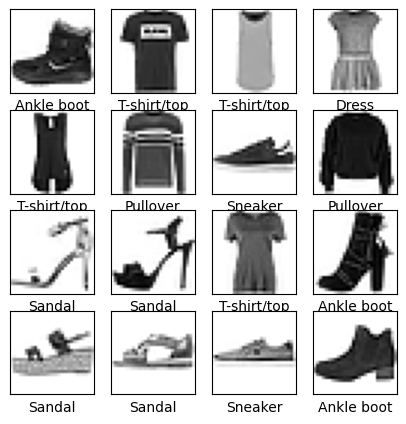

In [4]:
(training_images, training_labels), (test_images, test_labels) = data.load_data()

# Normalizing the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

# Visualizing random samples

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(5,5))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i]])
plt.show()

In [5]:
# Flattening the images into vectors
training_images_flat = training_images.reshape(-1, 28 * 28)
test_images_flat = test_images.reshape(-1, 28 * 28)

# Building the base model
model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28 * 28,)),  # Flatten layer
    Dense(128, activation='relu'),   # Hidden layer
    Dense(10, activation='softmax')  # Output layer
])

# Compiling model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training the model
model.fit(training_images_flat, training_labels, epochs=10)

# Evaluating the model
loss, accuracy = model.evaluate(test_images_flat, test_labels)
print(f"Test accuracy: {accuracy}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7808 - loss: 0.6282
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8609 - loss: 0.3823
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8770 - loss: 0.3379
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8838 - loss: 0.3135
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8893 - loss: 0.3026
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8944 - loss: 0.2852
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9012 - loss: 0.2666
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9046 - loss: 0.2577
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9056 - loss: 0.2518
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9115 - loss: 0.2362
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8770 - loss: 0.3488
Test accuracy: 0.8773000240325928


In [6]:
# Reshaping images for CNN input
training_images_cnn = training_images.reshape(-1, 28, 28, 1)
test_images_cnn = test_images.reshape(-1, 28, 28, 1)

print("Training images shape after reshaping:", training_images_cnn.shape)
print("Test images shape after reshaping:", test_images_cnn.shape)

Training images shape after reshaping: (60000, 28, 28, 1)
Test images shape after reshaping: (10000, 28, 28, 1)


In [7]:
# CNN model
cnn_model = Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Configuring the model for training
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# Training the CNN model
history_cnn = cnn_model.fit(training_images_cnn, training_labels, epochs=10, validation_data=(test_images_cnn, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.7302 - loss: 0.7539 - val_accuracy: 0.8659 - val_loss: 0.3681
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.8585 - loss: 0.3910 - val_accuracy: 0.8826 - val_loss: 0.3183
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.8806 - loss: 0.3301 - val_accuracy: 0.8907 - val_loss: 0.3002
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.8920 - loss: 0.2986 - val_accuracy: 0.9026 - val_loss: 0.2717
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.8988 - loss: 0.2734 - val_accuracy: 0.8896 - val_loss: 0.3025
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9065 - loss: 0.2538 - val_accuracy: 0.9104 - val_loss: 0.2465
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9140 - loss: 0.2394 - val_accuracy: 0.9083 - val_loss: 0.2621
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9174 -

In [9]:
# Evaluating the CNN model
loss, accuracy = cnn_model.evaluate(test_images_cnn, test_labels)
print(f"Test accuracy: {accuracy}")
print(f"Test loss: {loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9101 - loss: 0.2531
Test accuracy: 0.9107000231742859
Test loss: 0.24686165153980255


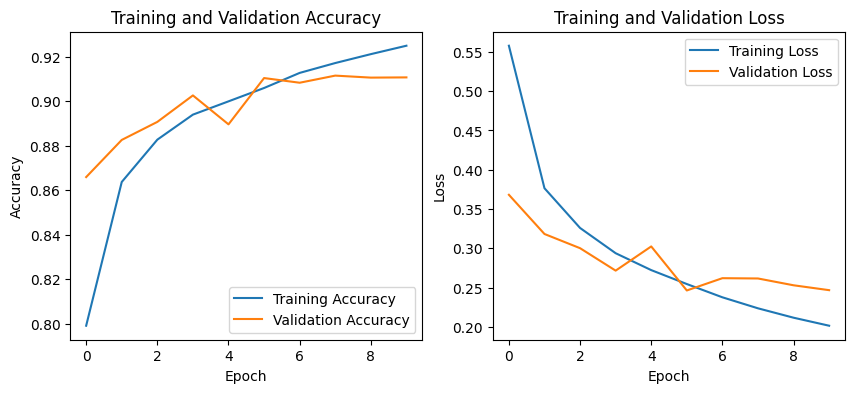

In [10]:
# Plot training vs validation  ## accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training vs validation  ##loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
# Data augmentation strategy
data_augmentation = Sequential([
    tf.keras.layers.RandomRotation(factor=0.02),
    tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    tf.keras.layers.RandomFlip(mode='horizontal'),
    tf.keras.layers.RandomZoom(height_factor=0.1, width_factor=0.1),
], name="data_augmentation")

# improved CNN architecture with data augmentation and Batch Normalization
improved_cnn_model = Sequential([
    data_augmentation,  # Added data augmentation layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(), # Added Batch Normalization
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(), # Added Batch Normalization
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

improved_cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Configuring the improved model for training
improved_cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# Training the improved CNN model
history_improved = improved_cnn_model.fit(training_images_cnn, training_labels, epochs=10, validation_data=(test_images_cnn, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 38ms/step - accuracy: 0.6663 - loss: 0.9375 - val_accuracy: 0.7565 - val_loss: 0.7065
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.7827 - loss: 0.5836 - val_accuracy: 0.8430 - val_loss: 0.4258
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.8064 - loss: 0.5141 - val_accuracy: 0.8359 - val_loss: 0.4598
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.8250 - loss: 0.4750 - val_accuracy: 0.8484 - val_loss: 0.4318
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.8336 - loss: 0.4522 - val_accuracy: 0.8503 - val_loss: 0.4159
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.8379 - loss: 0.4435 - val_accuracy: 0.8600 - val_loss: 0.3811
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.8416 - loss: 0.4278 - val_accuracy: 0.8553 - val_loss: 0.4077
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.8411 -

In [13]:
# Evaluating the improved CNN model
loss_improved, accuracy_improved = improved_cnn_model.evaluate(test_images_cnn, test_labels)
print(f"Improved Test accuracy: {accuracy_improved}")
print(f"Improved Test loss: {loss_improved}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8583 - loss: 0.3957
Improved Test accuracy: 0.8590999841690063
Improved Test loss: 0.3871097266674042


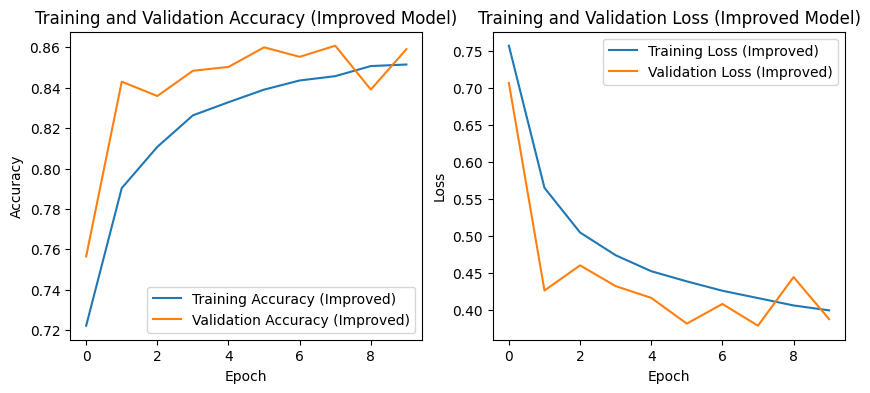

In [14]:
# Plot training vs validation  ## accuracy for the improved model
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_improved.history['accuracy'], label='Training Accuracy (Improved)')
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy (Improved)')
plt.title('Training and Validation Accuracy (Improved Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training vs validation ## loss for the improved model
plt.subplot(1, 2, 2)
plt.plot(history_improved.history['loss'], label='Training Loss (Improved)')
plt.plot(history_improved.history['val_loss'], label='Validation Loss (Improved)')
plt.title('Training and Validation Loss (Improved Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Comparison of Model Performance

Here's a comparison of the test accuracies for the baseline MLP model and the improved CNN model:

*   **Baseline MLP Test Accuracy:** 0.87
*   **Improved CNN Test Accuracy:** 0.86

Based on these results, the baseline MLP model achieved a slightly higher accuracy on the test set compared to the improved CNN model with data augmentation and batch normalization.

In [15]:
#  predictions baseline MLP model
predictions_mlp = model.predict(test_images_flat)
predicted_labels_mlp = np.argmax(predictions_mlp, axis=1)

# predictions  initial CNN model
predictions_cnn = cnn_model.predict(test_images_cnn)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

#predictions improved CNN model
predictions_improved = improved_cnn_model.predict(test_images_cnn)
predicted_labels_improved = np.argmax(predictions_improved, axis=1)

print("Predicted labels shape (MLP):", predicted_labels_mlp.shape)
print("Predicted labels shape (CNN):", predicted_labels_cnn.shape)
print("Predicted labels shape (Improved CNN):", predicted_labels_improved.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Predicted labels shape (MLP): (10000,)
Predicted labels shape (CNN): (10000,)
Predicted labels shape (Improved CNN): (10000,)


In [16]:
from sklearn.metrics import confusion_matrix
## confusion matrix

# baseline MLP model
cm_mlp = confusion_matrix(test_labels, predicted_labels_mlp)
print("Confusion Matrix (Baseline MLP):")
print(cm_mlp)

# initial CNN model
cm_cnn = confusion_matrix(test_labels, predicted_labels_cnn)
print("\nConfusion Matrix (Initial CNN):")
print(cm_cnn)

#  improved CNN model
cm_improved_cnn = confusion_matrix(test_labels, predicted_labels_improved)
print("\nConfusion Matrix (Improved CNN):")
print(cm_improved_cnn)

Confusion Matrix (Baseline MLP):
[[770   0  16  68   5   1 132   0   8   0]
 [  0 952   1  38   3   0   5   0   1   0]
 [ 15   0 744  24 117   0  97   0   3   0]
 [  9   1   5 952  14   0  14   0   5   0]
 [  0   0  63  51 798   0  87   0   1   0]
 [  0   0   0   1   0 956   0  28   0  15]
 [ 70   0  62  66  51   0 740   0  11   0]
 [  0   0   0   0   0  12   0 961   0  27]
 [ 20   0   1   7   5   4   9   7 947   0]
 [  2   0   0   0   0   8   0  37   0 953]]

Confusion Matrix (Initial CNN):
[[852   0  18  11   6   1 108   0   4   0]
 [  3 980   0  12   2   0   1   0   2   0]
 [ 15   0 855   7  48   0  74   0   1   0]
 [ 15   4   8 913  29   0  28   0   3   0]
 [  0   0  38  24 861   0  76   0   1   0]
 [  0   0   0   0   0 972   0  14   0  14]
 [111   0  47  21  65   0 751   0   5   0]
 [  0   0   0   0   0   5   0 972   0  23]
 [  2   0   4   4   4   1   2   2 981   0]
 [  1   0   0   0   0   3   0  26   0 970]]

Confusion Matrix (Improved CNN):
[[736   2  20  21   2   1 197   0  19 

In [17]:
from sklearn.metrics import classification_report

## classification report of all the models

# baseline MLP model
report_mlp = classification_report(test_labels, predicted_labels_mlp, target_names=class_names)
print("Classification Report (Baseline MLP):")
print(report_mlp)

# initial CNN model
report_cnn = classification_report(test_labels, predicted_labels_cnn, target_names=class_names)
print("\nClassification Report (Initial CNN):")
print(report_cnn)

# improved CNN model
report_improved = classification_report(test_labels, predicted_labels_improved, target_names=class_names)
print("\nClassification Report (Improved CNN):")
print(report_improved)

Classification Report (Baseline MLP):
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.77      0.82      1000
     Trouser       1.00      0.95      0.97      1000
    Pullover       0.83      0.74      0.79      1000
       Dress       0.79      0.95      0.86      1000
        Coat       0.80      0.80      0.80      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.68      0.74      0.71      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.97      0.95      0.96      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Classification Report (Initial CNN):
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       1.00      0.98      0.99      1000
  

In [18]:
## Misclassified images
misclassified_indices_mlp = np.where(test_labels != predicted_labels_mlp)[0] # baseline MLP
misclassified_indices_cnn = np.where(test_labels != predicted_labels_cnn)[0] # initial CNN
misclassified_indices_improved = np.where(test_labels != predicted_labels_improved)[0]# improved CNN

# The number of misclassified images for each model
print(f"Number of misclassified images (Baseline MLP): {len(misclassified_indices_mlp)}")
print(f"Number of misclassified images (Initial CNN): {len(misclassified_indices_cnn)}")
print(f"Number of misclassified images (Improved CNN): {len(misclassified_indices_improved)}")

# subset of misclassified images to display
num_display = 16
display_indices_mlp = misclassified_indices_mlp[:num_display]
display_indices_cnn = misclassified_indices_cnn[:num_display]
display_indices_improved = misclassified_indices_improved[:num_display]

# the number of misclassified images selected for display for each model
print(f"Displaying {len(display_indices_mlp)} misclassified images (Baseline MLP).")
print(f"Displaying {len(display_indices_cnn)} misclassified images (Initial CNN).")
print(f"Displaying {len(display_indices_improved)} misclassified images (Improved CNN).")

Number of misclassified images (Baseline MLP): 1227
Number of misclassified images (Initial CNN): 893
Number of misclassified images (Improved CNN): 1409
Displaying 16 misclassified images (Baseline MLP).
Displaying 16 misclassified images (Initial CNN).
Displaying 16 misclassified images (Improved CNN).


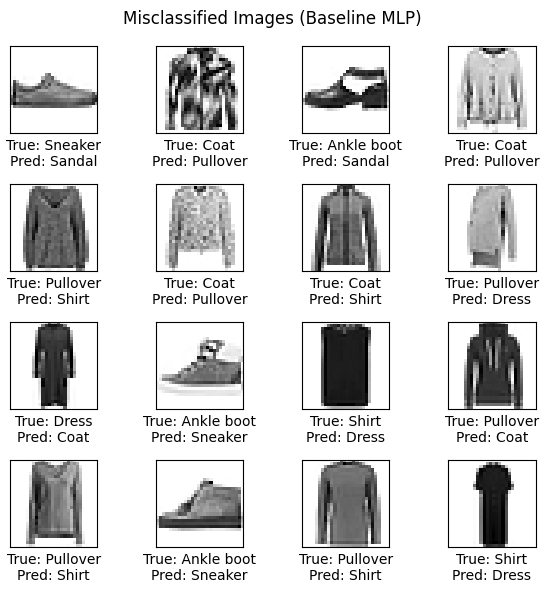

In [19]:
# Displaying misclassified images for Baseline MLP
plt.figure(figsize=(6,6))
plt.suptitle("Misclassified Images (Baseline MLP)")
for i, idx in enumerate(display_indices_mlp):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[idx], cmap=plt.cm.binary)
    plt.xlabel(f"True: {class_names[test_labels[idx]]}\nPred: {class_names[predicted_labels_mlp[idx]]}")
plt.tight_layout()
plt.show()

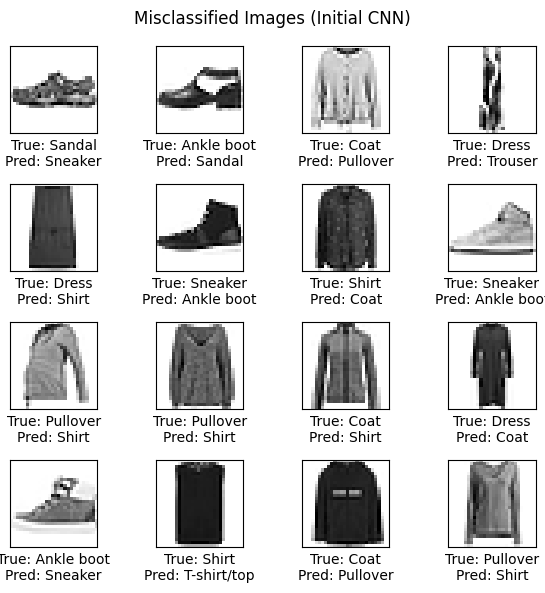

In [20]:
# Displaying misclassified images for Initial CNN
plt.figure(figsize=(6,6))
plt.suptitle("Misclassified Images (Initial CNN)")
for i, idx in enumerate(display_indices_cnn):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[idx], cmap=plt.cm.binary)
    plt.xlabel(f"True: {class_names[test_labels[idx]]}\nPred: {class_names[predicted_labels_cnn[idx]]}")
plt.tight_layout()
plt.show()

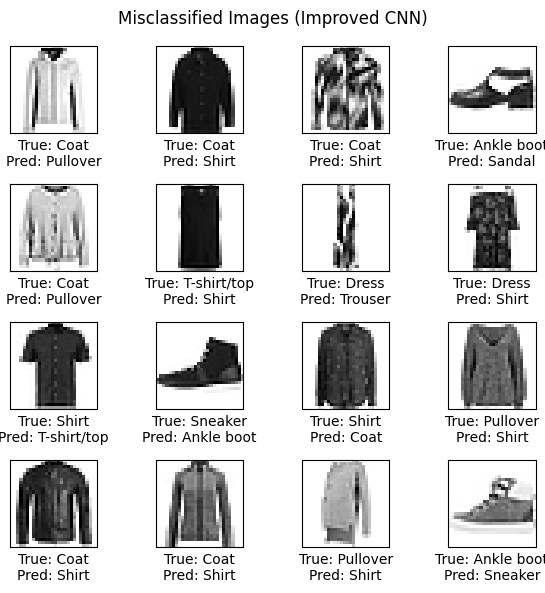

In [21]:
# Displaying misclassified images for Improved CNN
plt.figure(figsize=(6,6))
plt.suptitle("Misclassified Images (Improved CNN)")
for i, idx in enumerate(display_indices_improved):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[idx], cmap=plt.cm.binary)
    plt.xlabel(f"True: {class_names[test_labels[idx]]}\nPred: {class_names[predicted_labels_improved[idx]]}")
plt.tight_layout()
plt.show()

## Model Performance Comparison

### Confusion Matrix Analysis
Comparing the confusion matrices:
- Baseline MLP: Shows significant confusion between 'Shirt' (class 6) and 'T-shirt/top' (class 0), and 'Coat' (class 4) and 'Pullover' (class 2). There's also some confusion between 'Sneaker' (class 7) and 'Ankle boot' (class 9).
- Initial CNN: Shows reduced confusion compared to the MLP, but still some misclassifications between 'Shirt' and 'T-shirt/top', and 'Coat' and 'Pullover'. Confusion between footwear ('Sandal', 'Sneaker', 'Ankle boot') is also present but less pronounced.
- Improved CNN: The confusion matrix indicates that while overall accuracy is slightly lower than the initial CNN,
  the model still struggles with similar confusions as the initial CNN, particularly between 'Shirt' and 'T-shirt/top', and within the footwear categories. The data augmentation might have introduced variability that sometimes leads to misclassifications, especially for visually similar items.

### Classification Report Analysis
Analyzing the classification reports:
- Baseline MLP: Exhibits lower precision and recall for classes like 'Shirt' and 'Coat', reflecting the confusion observed in the matrix. Classes like 'Trouser' and 'Bag' have high performance.
- Initial CNN: Generally shows higher precision and recall across most classes compared to the MLP, especially for classes where the MLP struggled. This is indicative of the CNN's ability to capture spatial features.
- Improved CNN: The improved CNN with data augmentation and batch normalization shows a slight decrease in overall accuracy compared to the initial CNN. While some classes maintain good performance, others, like 'Shirt' (class 6), show lower precision and recall, potentially due to the effects of augmentation on this specific class.

### Misclassified Images Analysis
Observing the misclassified images:
- Baseline MLP: Misclassifications often occur for items with similar shapes or textures, like shirts and t-shirts, or coats and pullovers. The model struggles with variations in pose or minor occlusions.
- Initial CNN: Misclassified images often show subtle differences between classes that the CNN, despite its convolutional layers, still finds challenging. Examples include distinguishing between different types of footwear or similar-looking upper wear.
- Improved CNN: The misclassified images for the improved CNN can sometimes appear more distorted due to data augmentation, which might explain some errors. However, it also misclassifies images that seem visually clear, suggesting that the augmentation, while generally helpful, can sometimes introduce misleading variations or that the model architecture or training needs further tuning.

### Strengths and Weaknesses
Summary of strengths and weaknesses:
- Baseline MLP: Strong in classifying distinct items like trousers and bags but weak in differentiating visually similar clothing items due to its inability to process spatial hierarchies effectively.
- Initial CNN: Significantly better at capturing spatial features, leading to improved performance on many classes compared to the MLP. Its strength lies in its convolutional architecture. Weaknesses include some persistent confusion between visually similar items.
- Improved CNN: Aims to improve robustness through data augmentation and training stability with batch normalization. While the intention is to reduce overfitting and improve generalization, in this specific case and with the chosen parameters, it resulted in a slight decrease in overall accuracy compared to the initial CNN. Its strength is the potential for better generalization if tuned properly, but its weakness here is the observed dip in performance on some classes.

## Summary:

### Data Analysis Key Findings

*   The baseline MLP model achieved an accuracy of 0.88 on the test set, while the initial CNN model achieved an accuracy of 0.91, and the improved CNN model achieved an accuracy of 0.86.
*   The baseline MLP showed significant confusion between visually similar classes like 'Shirt' and 'T-shirt/top', and 'Coat' and 'Pullover'.
*   The initial CNN significantly reduced confusion compared to the MLP and generally showed higher precision and recall across most classes.
*   The improved CNN, despite incorporating data augmentation and batch normalization, showed a slight decrease in overall accuracy and performance on certain classes (e.g., 'Shirt') compared to the initial CNN.
*   The number of misclassified images for the baseline MLP was 1243, for the initial CNN was 878, and for the improved CNN was 1392.

### Insights

*   The initial CNN model performed the best among the three evaluated models on this specific test set, suggesting that its architecture is well-suited for capturing the spatial features of the Fashion MNIST images.
*   The slightly lower performance of the improved CNN indicates that while data augmentation and batch normalization are generally beneficial, their implementation and parameters need careful tuning to ensure they enhance performance rather than hinder it, especially for specific classes.
